In [5]:
# import kmeans
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv("../data/data.csv")
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

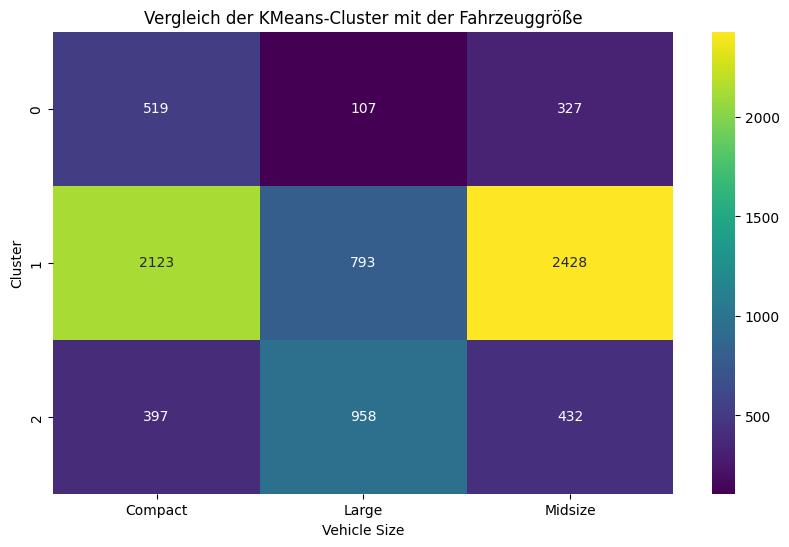

In [24]:
from sklearn.preprocessing import StandardScaler

# Anzahl der einzigartigen Fahrzeuggrößen ermitteln
# num_clusters = data['Vehicle Size'].nunique()
num_clusters = 3

data = data.dropna(axis=0).reset_index(drop=True)

data_without_size = data.drop(
    columns=['Vehicle Size'])

# Daten normalisieren
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_without_size.select_dtypes(include=[float, int]))

# KMeans-Algorithmus anwenden
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_normalized)

# Vergleich der erstellten Cluster mit der Fahrzeuggröße
comparison = pd.crosstab(data['Cluster'].astype(
    str), data['Vehicle Size'].astype(str))

plt.figure(figsize=(10, 6))
sns.heatmap(comparison, annot=True, fmt='d', cmap='viridis')
plt.title('Vergleich der KMeans-Cluster mit der Fahrzeuggröße')
plt.xlabel('Vehicle Size')
plt.ylabel('Cluster')
plt.show()